## 导包

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
from sympy import *
# from sympy.abc import *
# from sympy import gamma
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)

## 正态分布代码  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

# 概率论的基本概念

# 随机变量及其分布

## 随机变量

## 离散型随机变量及其分布率

### 0-1分布  
$\begin{array}{c|cc} 
X & 0 & 1 \\
\hline
p_k & 1-p & p \\
\end{array}$

### 二项分布 (伯努利分布)  
$X\sim b(n,p) \\ 
P\{X=k\}=C_n^kp^k(1-p)^{n-k} \ (k=0,1,...,n)$

### 泊松分布  
$X\sim \pi(\lambda) \\ 
P(x=k)=\frac{\lambda^k}{k!}e^{-\lambda} \ (k=0,1,2,...)$  
```
lamda = symbols('lamda')
px = exp(-lamda)*lamda**k/factorial(k)
```

### 几何分布
$X\sim G(p) \\
P(x=k)=p(1-p)^{k-1} \ (k=1,2,...)$  
$

### 超几何分布  
$X\sim H(N,M,n)$  
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

## 随机变量的分布函数

## 连续型随机变量及其概率密度

### 均匀分布  
$X\sim U(a,b)$  

### 指数分布  
$X\sim E(\lambda)$  
$f(x)=\begin{cases} \lambda e^{- \lambda t} & \text{for}\: t > 0 \\0 & \text{otherwise} \end{cases}$

In [322]:
t1 = symbols('t')
t = symbols('t', positive=True)
lamda = symbols('lamda', real=True)
ft = lamda * exp(-lamda * t)
ft_ = Piecewise((lamda * exp(-lamda * t1),t1>0),(0, True))
ft_
print_latex(ft_)

⎧   -λ⋅t           
⎪λ⋅ℯ      for t > 0
⎨                  
⎪   0     otherwise
⎩                  

\begin{cases} \lambda e^{- \lambda t} & \text{for}\: t > 0 \\0 & \text{otherwise} \end{cases}


### 正态分布  
$X\sim N(\mu, \sigma^2) \\ 
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{- \frac{\left(x - \mu \right)^{2}}{2 \sigma^{2}}}$  
```
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
```

In [325]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
print_latex(fx)

\frac{\sqrt{2} e^{- \frac{\left(- \mu + x\right)^{2}}{2 \sigma^{2}}}}{2 \sqrt{\pi} \sigma}


## 随机变量的函数的分布  
$$f_Y(y)=f_X(g^{-1}(y))|(g^{-1})\prime(y))|$$

In [7]:
X=np.array([-1,0,1,2])
p=np.array([0.2,0.3,0.1,0.4])
Y=3*X+2
Z=(X-1)**2
Y
Z

array([-1,  2,  5,  8])

array([4, 1, 0, 1], dtype=int32)

In [8]:
df1 = pd.DataFrame(data=np.stack((Z,p),axis=1),columns=['Z','p'])
df1
dfg1 = df1.groupby("Z")
dfg1.sum()


,Z,p
0,4.0,0.2
1,1.0,0.3
2,0.0,0.1
3,1.0,0.4


,p
Z,
0.0,0.1
1.0,0.7
4.0,0.2


In [9]:
# Discrete probability distribution
# 离散型随机变量函数的分布
def DPD(X, p):
    '''
    离散型随机变量函数的分布
    :param X: 离散型随机变量的取值
    :param p: 离散型随机变量的概率
    :return: 离散型随机变量函数的分布
    '''
    return pd.DataFrame(data=np.stack((X, p), axis=1),
                        columns=['X', 'p']).groupby('X').sum()# 去重
DPD(X,p)
DPD(Y,p)
DPD(Z,p)

,p
X,
-1.0,0.2
0.0,0.3
1.0,0.1
2.0,0.4


,p
X,
-1.0,0.2
2.0,0.3
5.0,0.1
8.0,0.4


,p
X,
0.0,0.1
1.0,0.7
4.0,0.2


#### 例3  
设随机变量X的概率密度函数为  
$f_X(x)=\frac{1}{\pi(1+x^2)}$  
求随机变量$Y=1-\sqrt[3]{X}$的概率密度

In [10]:
from sympy import symbols, integrate, pi, oo, diff, solve, Symbol, Abs

In [11]:
# 连续型随机变量函数的分布

x,y = symbols('x y')
f = 1- x**(1/3)-y
x1 = solve(f,x)[0] # solve得到列表, 值为f的反函数
fx=1/(pi*(1+x**2)) # X的概率密度函数
# fy = -fx.subs({x:x1})*diff(x1,y)
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
fy
integrate(fx, (x,-oo,oo))
integrate(fy, (y,-oo,oo))

3*Abs((y - 1.0)**2)/(pi*((y - 1.0)**6 + 1))

1

1

#### 例4 
设随机变量 $X\sim N(\mu, \sigma^2)$   
试证明随机变量$Y=aX+b$也服从正态分布  
$$X \sim \mathcal{N}(\mu, \sigma^2)$$  

In [12]:
from sympy import sqrt, exp, simplify

In [13]:
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
mu,sigma = 3, 2
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
integrate(fx, (x, -oo, oo))
mu_ = integrate(x*fx, (x, -oo, oo)) # 期望
sigma_ = sqrt(integrate(x**2*fx, (x, -oo, oo)) - mu_**2) # 标准差
integrate((x-mu_)**2*fx, (x, -oo, oo)) # 方差
mu_,sigma_

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

1

4

(3, 2)

In [14]:
a, b, x, y = symbols('a b x y')
f = a*x+b-y
x1 = solve(f,x)[0]
x1
fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
fy
# integrate(fx, (x,-oo,oo))
# integrate(fy, (y,-oo,oo))
simplify(fy)

(-b + y)/a

sqrt(2)*exp(-(-3 + (-b + y)/a)**2/8)*Abs(1/a)/(4*sqrt(pi))

sqrt(2)*exp(-(3*a + b - y)**2/(8*a**2))*Abs(1/a)/(4*sqrt(pi))

In [87]:
# 反函数inverse function
x,y = symbols('x y')
f = 1- x**(1/3)-y
def inv_func(func,x):
    '''
    计算反函数
    :param func: 原函数 
    :param x: 自变量
    :return: 
    '''
    return solve(func,x)[0]
inv_func(f,x)
type(x)
type(f)
# 计算函数的分布
a, b, x, y = symbols('a b x y')
f = a*x+b-y
def func_density(fx, func, x, y):
    '''
    已知原分布概率密度求函数的概率密度
    :param fx: 自变量的分布
    :param func: 原函数
    :param x: 原分布的自变量
    :param y: 因变量，新分布的自变量
    :return: 
    '''
    x1 = solve(func,x)[0]
    fy = fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
    return fy

# def func_dist(Fx, Func, x, y):
#     '''
#     已知原分布分布函数求函数的分布函数
#     :param Fx: 自变量的分布
#     :param Func: 原函数
#     :param x: 原分布的自变量
#     :param y: 因变量，新分布的自变量
#     :return: 
#     '''
#     x1 = solve(Func,x)[0]
#     fy = Fx.subs({x:x1})*Abs(diff(x1,y)) # 导数的绝对值
#     return fy
# func_dist(fx,f,x,y)

-(y - 1.0)**3

sympy.core.symbol.Symbol

sympy.core.add.Add

#### 例5
设随机变量X服从区间\[-1,9\]上的均匀分布求随机变量$Y=g(X)$的概率分布
$$g(x)=\begin{cases}-1 & x<1 \\ 1 & x=1 \\ 2 & 1<x\le 6 & \\ 3 & x>6\end{cases}$$

In [39]:
x,y = symbols('x y')
g = Piecewise((-1,x<1),(1,(x>=1)&(x<=1)),(2, (x>1) & (x<=6)),(3, x>6)) 
g
# plot(g)

Piecewise((-1, x < 1), (1, Eq(x, 1)), (2, (x <= 6) & (x > 1)), (3, x > 6))

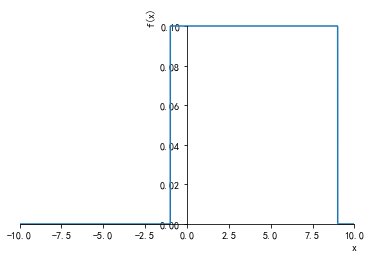

1.00000000000000

In [122]:
fx = Piecewise((0.1,(x>=-1) & (x<9)),(0, True))
plot(fx)
integrate(fx,(x,-oo,oo))


In [75]:
g
g.subs(x,1)
g.subs({x:1})
[g.subs(x,i) for i in [1,2,3,4]]
ranges = [-oo,1,6,+oo]
p_list = []
for i in range(len(ranges)-1):
    p_list.append(integrate(fx,(x, ran[i], ranges[i+1])).evalf(2))
#     g.subs(x,integrate(fx,(x, ran[i], ran[i+1])))
p_list
pd.DataFrame(data=np.stack(([-1,2,3],p_list),axis=1),columns=['Y','p'])

Piecewise((-1, x < 1), (1, Eq(x, 1)), (2, (x <= 6) & (x > 1)), (3, x > 6))

1

1

[1, 2, 2, 2]

[0.20, 0.50, 0.30]

,Y,p
0,-1,0.20
1,2,0.50
2,3,0.30


#### 2003年数学三第11题  
设随机变量X的概率密度为$$f(x)=\begin{cases} \frac{1}{3\sqrt[3]{x^2}} & x \in [1,8]\\0 & other\end{cases}$$
F(X)是X的分布函数，求随机变量Y=F(X)的分布函数  


In [79]:
from fractions import Fraction

Piecewise((1/(3*x**(2/3)), (x >= 1) & (x <= 8)), (0, True))

2**(1/3)/6

1

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


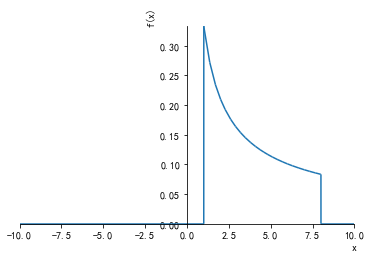

Piecewise((Piecewise((0, x < 1), (Min(8, x)**(1/3) - 1, True)), (x >= 1) & (x <= 8)), (0, x < 1), (1, x > 1))

<string>:1: RuntimeWarning: invalid value encountered in double_scalars


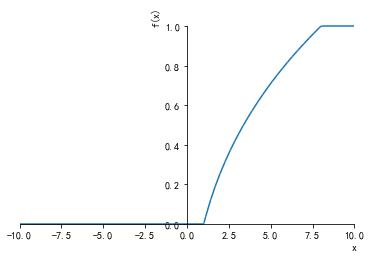

-1 + 3**(1/3)

In [108]:
t = symbols('t')
fx = Piecewise((1/(3*x**(Fraction(2,3))),(x>=1)&(x<=8)),(0,True)) # 概率密度
fx
fx.subs(x,2)
integrate(fx,(x,-oo,oo))
# solve(fx,x)
plot(fx)

# 分布函数同时也是Y的方程
Fx = Piecewise((integrate(fx,(x,1,x)),(x>=1)&(x<=8)),(0,x<1),(1,x>1)) 
Fx
plot(Fx)
Fx.subs(x,3)

Piecewise((Piecewise((0, (y + 1.0)**3 < 1), (Min(8, (y + 1.0)**3)**(1/3) - 1, True)), (y >= 0) & (y <= 1.0)), (0, (y + 1.0)**3 < 1), (1, (y + 1.0)**3 > 1))

Piecewise((0, y < 0), (y, y <= 1), (1, True))

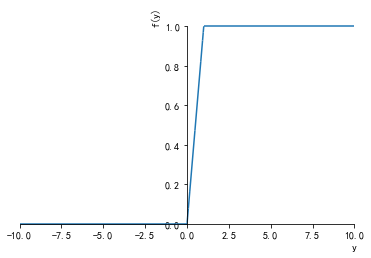

Piecewise((0, y < 0), (1, y <= 1), (0, True))

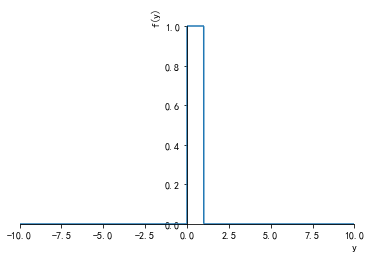

In [121]:
Fx_ = x**(1/3)-1-y
# fx_
# inv_func(f,x)
x1 = inv_func(Fx_,x)
Fx.subs(x,x1) #等待化简的结果

# Y的分布函数
Fy = Piecewise((0,y<0),(y,(y>=0) & (y<=1)),(1,y>1))
Fy
plot(Fy)
fy = diff(Fy,y)
fy
plot(fy)

# 多维随机变量及其分布

## 二维随机变量

## 边缘分布

## 条件分布

## 相互独立的随机变量

## 两个随机变量的函数的分布

### 连续性随机变量的函数的分布

#### 例1  
大炮打靶时，炮弹弹着点(X,Y)(设靶心为原点)服从二维正态分布$N(0,0,\sigma^2,\sigma^2,0)$，求带着点到靶心距离Z的概率密度

解：  
Z的分布函数
$$F_Z(z)=P(Z<z)=\iint_{\sqrt{x^2+y^2}\le z}\frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}dxdy$$

In [137]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
mu=0
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
fy = (1/(sigma*sqrt(2*pi)))*exp(-(y-mu)**2/(2*sigma**2))
fxy=fx*fy
fxy
fxy = simplify(fxy)
fxy

sqrt(2)*exp(-x**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

exp(-x**2/(2*sigma**2))*exp(-y**2/(2*sigma**2))/(2*pi*sigma**2)

exp((-x**2 - y**2)/(2*sigma**2))/(2*pi*sigma**2)

In [144]:
# 化为极坐标积分
rho,theta = symbols('rho theta')
fxy_ = fxy.subs({x: rho*cos(theta),y:rho*sin(theta)})
fxy_ = simplify(fxy_)
fxy_
Fz_=Integral(rho*fxy_,(rho, 0, z),(theta, 0, 2*pi))
# 结果
simplify(Fz.doit())
Fz = Piecewise((simplify(Fz.doit()),z>=0),(0,z<0))
Fz

exp(-rho**2/(2*sigma**2))/(2*pi*sigma**2)

Piecewise((1 - exp(-z**2/(2*sigma**2)), z >= 0), (0, True))

Piecewise((1 - exp(-z**2/(2*sigma**2)), z >= 0), (0, True))

瑞利分布

In [148]:
# 概率密度
# 瑞利分布
fz = diff(Fz,z)
fz

Piecewise((z*exp(-z**2/(2*sigma**2))/sigma**2, z >= 0), (0, True))

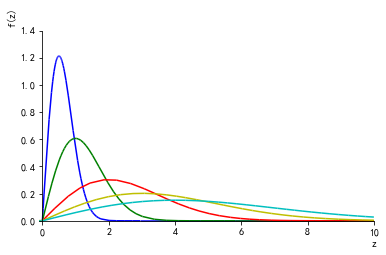

In [183]:
fz_list=[]
for i in [0.5,1,2,3,4]:
    fz_list.append(fz.subs(sigma,i))

p = plot(*fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.5))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

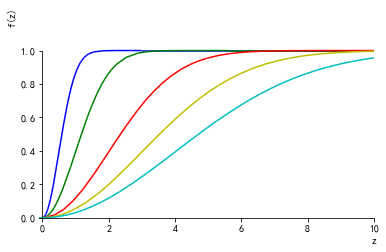

In [185]:
Fz_list=[]
for i in [0.5,1,2,3,4]:
    Fz_list.append(Fz.subs(sigma,i))

p = plot(*Fz_list,show=False,xlim=(-0.1,10),ylim=(-0.1,1.2))
p[0].line_color='b'
p[1].line_color='g'
p[2].line_color='r'
p[3].line_color='y'
p[4].line_color='c'

p.show()

#### 例2  2001年数学三第12题
设随机变量$X$和$Y$的联合分布是正方形$$G=\{(x,y)|1\le x \le 3,1\le y \le 3\}$$上的均匀分布，试求随机变量$U=|X-Y|$的概率密度$p(u)$

In [240]:
x, y, u = symbols('x y u')
# X,Y的联合概率密度
fxy = Piecewise((1 / 4, (x >= 1) & (x <= 3) & (y >= 1) & (y <= 3)), (0, True))
fxy
fxy.subs({x: 1, y: 0})
# 设四个点的坐标(1,y1)(x1,3) (x2,1)(3,y2)
f1 = x + u - y
f2 = x - u - y
y1 = solve(f1.subs(x,1),y)
y2 = solve(f2.subs(x,3),y)
x1 = solve(f1.subs(y,3),x)
x2 = solve(f2.subs(y,1),x)
(1,y1)
(x1,3)
(x2,1)
(3,y2)
# U的分布函数
Fu=Piecewise(((4-(3-(u+1))**2)/4,(u>0)&(u<2)),(1,u>=2),(0,u<=0))
Fu
# U的概率密度
fu = diff(Fu,u)
fu

Piecewise((0.25, (x >= 1) & (y >= 1) & (x <= 3) & (y <= 3)), (0, True))

0

(1, [u + 1])

([3 - u], 3)

([u + 1], 1)

(3, [3 - u])

Piecewise((1 - (2 - u)**2/4, (u > 0) & (u < 2)), (1, u >= 2), (0, u <= 0))

Piecewise((1 - u/2, (u > 0) & (u < 2)), (0, (u >= 2) | (u <= 0)))

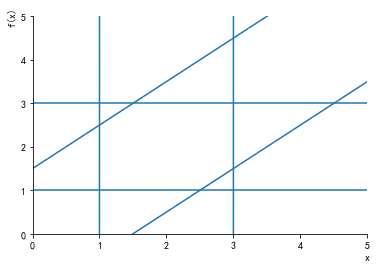

In [231]:
u_=1.5
p = plot(1,3,x-u_,x+u_,10000*(x-1),10000*(x-3),xlim=(0,5),ylim=(0,5),show=False)
p.show()

### 二维离散型随机变量  
方法类似于一维离散型随机变量

假设随机变量$X1,X2,X3,X4$相互独立且同分布,  
$P\{X_i=0\}=0.6, \ P\{X_i=1\}=0.4 \ (i=1,2,3,4)$  
求行列式$X = \begin{vmatrix}X_1 & X_2 \\ X_3 & X_4\\ \end{vmatrix}$的概率分布

### Z=X+Y的概率分布  
$f_Z(z)=\int_{-\infty}^{\infty}f(z-y,y)dy$  
$f_Z(z)=\int_{-\infty}^{\infty}f(x,z-x)dx$  
***
如果$X$和$Y$相互独立  
卷积公式  
$f_X*f_Y=\int_{-\infty}^{\infty}f_X(z-y)f_Y(y)dy=\int_{-\infty}^{\infty}f_X(x)f_Y(z-x)dx$  
***
$Z=aX+bY$  
$f_X*f_Y=\int_{-\infty}^{\infty}\frac{1}{|a|}f_X(\frac{z-by}{a})f_Y(y)dy=\int_{-\infty}^{\infty}\frac{1}{|b|}f_X(x)f_Y(\frac{z-ax}{b})dx$  


#### 例5   
设$X$和$Y$是两个相互独立的随机变量，它们都服从标准正态分布$N(0,1)$，求$Z=X+Y$的概率密度

In [10]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
f = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx = f.subs({mu:0,sigma:1})
fy = f.subs({x:y,mu:0,sigma:1})
fx
fy
fxyz = Integral(fx*fy.subs(y,z-x),(x,-oo,+oo))
fxyz_ = simplify(fxyz.doit())
fxyz
fxyz_

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

sqrt(2)*exp(-y**2/2)/(2*sqrt(pi))

Integral(exp(-x**2/2)*exp(-(-x + z)**2/2)/(2*pi), (x, -oo, oo))

exp(-z**2/4)/(2*sqrt(pi))

正态分布的可加性  

$若X\sim N(0,1),Y\sim N(0,1)且X和Y相互独立 \\ 
则X+Y\sim N(0,2)$  
$若X\sim N(\mu_1,\sigma_1^2),Y\sim N((\mu_2,\sigma_2^2)且X和Y相互独立 \\ 
则X+Y\sim N(\mu_1+\mu_2,\sigma_1^2+\sigma_2^2)\\
则aX+bY\sim N(a\mu_1+b\mu_2,a^2\sigma_1^2+b^2\sigma_2^2)$  

以上结果还可以推广n个正态分布的随机变量  
***
二项分布和泊松分布也具有可加性  

$X\sim b(n,p),y\sim b(m,p)且X和Y相互独立\Rightarrow X+Y\sim b(n+m,p)$  
即：$P\{X=k\}=C_n^kp^k(1-p)^{n-k},(k=0,1,...,n)\\
P\{Y=k\}=C_m^kp^k(1-p)^{m-k},(k=0,1,...,m)\\
P\{X+Y=k\}=C_{m+n}^kp^k(1-p)^{n+m-k},(k=0,1,...,n)$  
***  
$X\sim \pi(\lambda_1),y\sim \pi(\lambda_2)且X和Y相互独立\Rightarrow X+Y\sim \pi(\lambda_1+\lambda_2)$  
即：$P\{X=k\}=\frac{\lambda_1^k}{k!}e^{-\lambda_1}\\
P\{Y=k\}=\frac{\lambda_2^k}{k!}e^{-\lambda_2}\\
P\{X+Y=k\}=\frac{(\lambda_1+\lambda_2)^k}{k!}e^{-(\lambda_1+\lambda_2)}$

In [28]:
m, n, k, p = symbols('m n k p')
f = combine(n, k) * p**(k) * (1 - p)**(n - k)
f
fn = f.subs(n, n)
fm = f.subs(n, m)
fn
fm
# simplify(fn+fm)

p**k*(1 - p)**(-k + n)*factorial(n)/(factorial(k)*factorial(-k + n))

p**k*(1 - p)**(-k + n)*factorial(n)/(factorial(k)*factorial(-k + n))

p**k*(1 - p)**(-k + m)*factorial(m)/(factorial(k)*factorial(-k + m))

例7  
$对于简单电路中，两电阻的R_1和R_2串联连接,设R_1和R_2相互独立,它们的概率密度均为\\
f(x)=\begin{cases}\frac{10-x}{50} & 0\le x\le 10\\ 0 & 其它\end{cases}\\
求总电阻R=R_1+R_2的概率密度$

In [64]:
x,y,z = symbols('x y z')
f=Piecewise(((10-x)/50,(x>=0)&(x<=10)),(0,True))
integrate(f,(x,-oo,oo))

In [65]:
fx = f.subs(x,x)
fy = f.subs(x,z-x)
fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)))
# fxy = Piecewise((fx*fy, (x>=0)&(x<=10)&(x>=z-10)&(x<=z)&(z>=10)&(z<20)))
simplify(fxy)
fz = Integral(fx*fy,(x,-oo,oo))
fz
simplify(Piecewise((fz.doit(),(z>=10)&(z<20))))
simplify(fz.subs(z,10).doit())

⎧⎧(10 - x)⋅(x - z + 10)                                                       
⎪⎪─────────────────────  for x ≥ 0 ∧ x - z ≥ -10 ∧ x ≤ 10 ∧ x - z ≤ 0         
⎨⎨         2500                                                        for x ≥
⎪⎪                                                                            
⎩⎩          0                             otherwise                           

                                
                                
 0 ∧ x ≥ z - 10 ∧ x ≤ 10 ∧ x ≤ z
                                
                                

∞                                                                          
⌠                                                                          
⎮  ⎧⎛1   x ⎞ ⎛x    z    1⎞                                                 
⎮  ⎪⎜─ - ──⎟⋅⎜── - ── + ─⎟  for x ≥ 0 ∧ x - z ≥ -10 ∧ x ≤ 10 ∧ x - z ≤ 0   
⎮  ⎨⎝5   50⎠ ⎝50   50   5⎠                                               dx
⎮  ⎪                                                                       
⎮  ⎩          0                              otherwise                     
⌡                                                                          
-∞                                                                         

⎧                  2                               2                          
⎪  z⋅Max(0, z - 10)    z⋅Max(0, z - 10, Min(10, z))    (z - 10)⋅Max(0, z - 10)
⎨- ───────────────── + ───────────────────────────── + ───────────────────────
⎪         5000                      5000                         250          
⎩                                                                             

                                                       3                      
   (z - 10)⋅Max(0, z - 10, Min(10, z))   Max(0, z - 10)    Max(0, z - 10, Min(
 - ─────────────────────────────────── + ─────────────── - ───────────────────
                   250                         7500                    7500   
                                                                              

       3                     
10, z))                      
────────  for z ≥ 10 ∧ z < 20
                             
                             

In [66]:
# 变量代换
g = x+1+Max(x,0)
g1=g.subs(x,(z1+1))
g1
g1.subs(z1,(z**2))

In [70]:
# 计算当10<=z<=20时的概率密度
# 通过正负值的变换来控制Max和Min函数的取值
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
Max((z2+20),20)
fz_ = fz.doit()
fz_
fz_2 = fz_.subs(z,(z1+10))
fz_2
fz_2 = fz_2.subs(z1,(z-10))
fz_2
fz_2 = fz_2.subs(z,(z2+20))
fz_2
fz_2 = fz_2.subs(z2,(z-20))
fz_2 = simplify(fz_2)
fz_2
fz_2.subs(z,10)
simplify(fz_2*15000) # 结果
# fz_.subs(z,(z2+20))


In [36]:
# 计算当0<=z<=10时的概率密度
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
fz_ = fz.doit()
fz_1 = fz_.subs(z, z1).subs(z1, z2 + 10).subs(z2, z - 10)
fz_1 = simplify(fz_1)  # 结果
fz_1

z*(z**2 - 60*z + 600)/15000

z*(z**2 - 60*z + 600)/15000

-z**3/15000 + z**2/250 - 2*z/25 + 8/15

Piecewise((z*(z**2 - 60*z + 600)/15000, (z >= 0) & (z < 10)), (-z**3/15000 + z**2/250 - 2*z/25 + 8/15, (z >= 10) & (z < 20)), (0, True))

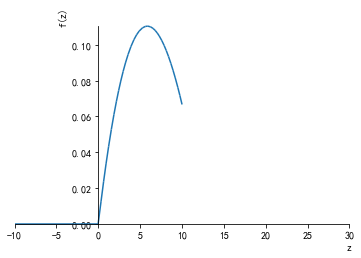

In [51]:
# 最终结果
fz_1
fz_2
fz_f = Piecewise((fz_1,(z>=0)&(z<10)),(fz_2,(z>=10)&(z<20)),(0,True))
fz_f
plot(fz_f,xlim=(-10,30)) # sympy 中的plot只能绘制(-10,10)之间的图像


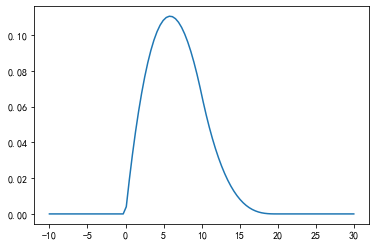

In [57]:
# 替换方案
x1 = np.linspace(-10,30,100)
y1 = fz_f.subs(z,x1)
# x1
y1 = []
for x1_ in x1:
    y1.append(fz_f.subs(z,x1_))
# y1
plt.plot(x1,y1)

#### 2007年数学三第23题    
$设二维随机变量(X,Y)的概率密度为\\
f(x,y)=\begin{cases}2-x-y & 0<x<1,0<y<1\\0 & 其它 \end{cases} \\
求(I)P\{X>2Y\};(II)求Z=X+Y的概率密度f_Z(z)
$

In [59]:
x,y,z = symbols('x y z')
fxy = Piecewise((2-x-y,(x>0)&(x<1)&(y>0)&(y<1)),(0,True))
fxy
Integral(fxy,(x,0,1),(y,0,1)).doit() # 说明是概率密度
# X>2Y概率最终结果
Integral(fxy,(y,0,x/2),(x,0,1)).doit()

Piecewise((-x - y + 2, (x > 0) & (y > 0) & (x < 1) & (y < 1)), (0, True))

1

7/24

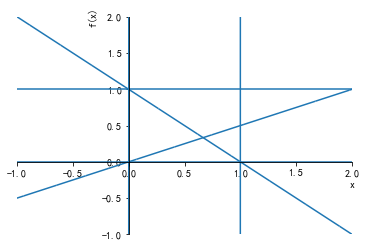

In [60]:
# 区域绘图
z_=1
p = plot(0,1,x/2,z_-x,10000*(x-0),10000*(x-1),xlim=(-1,2),ylim=(-1,2),show=False)
p.show()

In [61]:
fz = Integral(fxy.subs(y,(z-x)),(x,-oo,oo))
fz
fz_ = fz.doit()
fz_

Integral(Piecewise((2 - z, (x > 0) & (x < 1) & (x - z > -1) & (x - z < 0)), (0, True)), (x, -oo, oo))

-(2 - z)*Max(0, z - 1) + (2 - z)*Max(0, z - 1, Min(1, z))

In [62]:
z1 = symbols('z', positive=True)
z2 = symbols('z', negative=True)
# 计算区间(0,1)
fz_1 = fz_.subs(z,z1).subs(z1,(z2+1)).subs(z2,(z-1))
simplify(fz_1)
# 计算区间(1,2)
fz_2 = fz_.subs(z,(z1+1)).subs(z1,(z-1)).subs(z,(z2+2)).subs(z2,(z-2))
fz_2 = simplify(fz_2)
fz_2

z*(2 - z)

z**2 - 4*z + 4

Piecewise((z*(2 - z), (z > 0) & (z < 1)), (z**2 - 4*z + 4, (z > 1) & (z < 2)), (0, True))

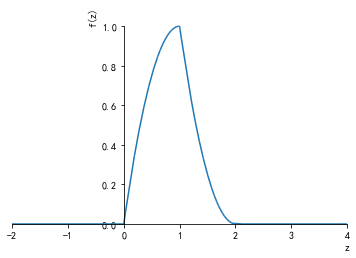

In [63]:
# Z=X+Y最终结果
fz_f = Piecewise((fz_1,(z>0)&(z<1)),(fz_2,(z>1)&(z<2)),(0,True))
fz_f
plot(fz_f,xlim=(-2,4))

#### 考研题  
$设随机变量X与Y独立，X服从正态分布N(\mu,\sigma^2),Y服从[-\pi,\pi]上的均匀分布。\\
试求Z=X+Y的概率密度，分布计算结果用标准正态分布函数\Phi(x)表示\\
其中:\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-\frac{t^2}{2}}dt$

In [67]:
x,y,z = symbols('x y z')
mu,sigma = symbols('mu sigma')
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fy = Piecewise((1/(2*pi),(y>=-pi)&(y<=pi)),(0,True))
fx
fy

sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

Piecewise((1/(2*pi), (y <= pi) & (y >= -pi)), (0, True))

Piecewise((1/(2*pi), (x - z <= pi) & (x - z >= -pi)), (0, True))

Integral(Piecewise((sqrt(2)*exp(-(-mu + x)**2/(2*sigma**2))/(4*pi**(3/2)*sigma), (x - z <= pi) & (x - z >= -pi)), (0, True)), (x, -oo, oo))

-erf(sqrt(2)*(-mu + z - pi)/(2*sigma))/(4*pi) + erf(sqrt(2)*(-mu + z + pi)/(2*sigma))/(4*pi)

(erf(sqrt(2)*(-mu + z + pi)/(2*sigma)) + erf(sqrt(2)*(mu - z + pi)/(2*sigma)))/(4*pi)

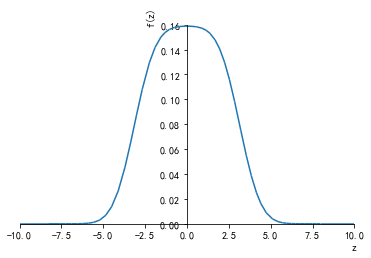

In [96]:
# 利用卷积公式
fz = Integral(fx*fy.subs(y,(z-x)),(x,-oo,oo))
fz
fz = fz.doit()
fz
simplify(fz)
plot(fz.subs({mu:0,sigma:1}))

erf(x)

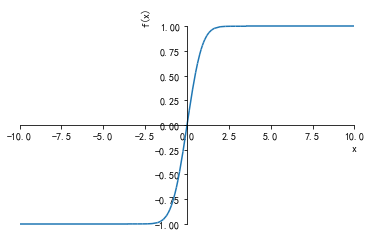

In [73]:
expand(erf(x))
plot(erf(x))

In [102]:
x, t = symbols('x t')
ef = (2/sqrt(pi))*integrate(exp(-t**2),(t,-oo,x))
ef
simplify(ef)
# 高斯分布与误差函数的关系
Integral(fx.subs({mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:sqrt(2)*x,mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:2*x,mu:0,sigma:1}),(x,-oo,x)).doit()
Integral(fx.subs({x:3*x,mu:0,sigma:1}),(x,-oo,x)).doit()

2*(sqrt(pi)*erf(x)/2 + sqrt(pi)/2)/sqrt(pi)

erf(x) + 1

erf(sqrt(2)*x/2)/2 + 1/2

sqrt(2)*erf(x)/4 + sqrt(2)/4

erf(sqrt(2)*x)/4 + 1/4

erf(3*sqrt(2)*x/2)/6 + 1/6

$标准正态分布与误差函数的关系\\
erf(\frac{x}{\sqrt{2}})=2\Phi(x)-1\\
erf(x)=2\sqrt{2} \Phi(\sqrt{2}x)-1\\
erf(ax)=2\sqrt{2}a \Phi(\sqrt{2}ax)-1\\
\Phi(x)=\frac{erf(\frac{x}{\sqrt{2}})+1}{2}\\
\Phi(\sqrt{2} x)=\frac{erf(x)+1}{2\sqrt2}\\
\Phi(ax)=\frac{erf(a\frac{x}{\sqrt{2}})+1}{2a}$

### 积Z=XY与商Z=X/Y的分布

$设X,Y是二维连续型随机变量，其概率密度为f(x,y)\\
则随机变量Z=Y/X的概率密度为\\
f_{Y/X}(z)=\int_{-\infty}^{\infty}|x|f(x,xz)dx\\
随机变量Z=XY的概率密度为\\
f_{XY}(z)=\int_{-\infty}^{\infty}{1\over|x|}f(x,{z\over x})dx$

####  例8  
$设随机变量X,Y相互独立他们的概率密度均为\\
p(x)=\begin{cases}e^{-x}&x>0\\0&x\le 0\end{cases}\\
求Z=Y/X概率密度$

In [108]:
x,y,z = symbols('x y z')
fx = Piecewise((exp(-x),x>0),(0,True))
fx
integrate(fx,(x,-oo,oo)) # 概率为1，说明是概率密度
fy = fx.subs(x,y)
fy
fxy = fx*fy
simplify(fxy)

Piecewise((exp(-x), x > 0), (0, True))

1

Piecewise((exp(-y), y > 0), (0, True))

Piecewise((exp(-x - y), (x > 0) & (y > 0)), (0, True))

Piecewise((1/(z**2 + 2*z + 1), z > 0), (0, True))

Integral(Piecewise((x*exp(-x*(z + 1)), (x > 0) & (x*z > 0)), (0, True)), (x, 0, oo))

Piecewise((1/(z**2 + 2*z + 1), z > 0), (0, True))

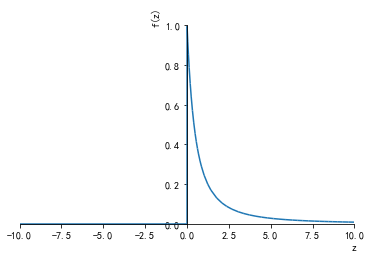

In [153]:
x1 = symbols('x',positive=True)
z1 = symbols('z',positive=True)
x2 = symbols('x',negative=True)
z2 = symbols('z',negative=True)
fz_ = Integral(fxy.subs({x:x1,y:(z*x)}).subs(z,z1)*Abs(x),(x,-oo,oo)) # 带绝对值的不好求
simplify(fz)
# x>0,z>0
fz1 = Integral(fxy.subs({y:(z*x)}).subs(z,z1)*x,(x,0,oo)) # z用正值替换很重要
simplify(fz1)

fz = Piecewise((fz1.doit().subs(z1,z),z>0),(0,True)) # 最后结果
fz
plot(fz)

#### 例9  
$某保险公司提供一个险种，保险费Y和保险赔付X的概率密度分别为\\
h(y)=\begin{cases}{y\over 25}e^{-{y\over 5}}&y>0\\0&y\le 0\end{cases}\ g(x)=\begin{cases}{1\over 5}e^{-{x\over 5}}&x>0\\0&x\le 0\end{cases}\\
设X与Y相互独立,求Z=Y/X的概率密度$

In [157]:
x,y,z = symbols('x y z')
hy = Piecewise(((y/25)*exp(-(y/5)),y>0),(0,True)) 
gx = Piecewise(((1/5)*exp(-(x/5)),x>0),(0,True)) 
hy
gx
integrate(hy,(y,-oo,oo))
integrate(gx,(x,-oo,oo))
fxy = simplify(gx*hy)
fxy

Piecewise((y*exp(-y/5)/25, y > 0), (0, True))

Piecewise((0.2*exp(-x/5), x > 0), (0, True))

1

1.00000000000000

Piecewise((0.008*y*exp(-x/5 - y/5), (x > 0) & (y > 0)), (0, True))

Integral(Piecewise((0.008*x**2*z*exp(-x*z/5 - x/5), (x > 0) & (x*z > 0)), (0, True)), (x, 0, oo))

2.0*z/(z**3 + 3*z**2 + 3*z + 1)

Piecewise((2.0*z/(z + 1)**3, z > 0), (0, True))

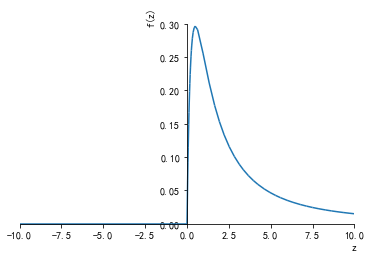

In [170]:
z1 = symbols('z',positive=True)
fz_ = Integral(fxy.subs({y:(x*z),z:z1})*x,(x,0,oo))
fz_
fz_ = fz_.doit()
fz_
# fz = Piecewise((factor(fz_),z1>0),(0,True)) # 这么写不行，要换回z
fz = Piecewise((factor(fz_.subs(z1,z)),z>0),(0,True)) # 最后结果
fz
plot(fz)

#### 例10  
$设随机变量的概率密度为\\
f(x,y)=\begin{cases}x+y&0<x<1,0<y<1\\0&其它\end{cases}\\
求Z=XY的概率密度$

In [194]:
x,y,z = symbols('x y z')
z1 = symbols('z',positive=True)
z2 = symbols('z',negative=True)
fxy = Piecewise((x+y,(x>0)&(x<1)&(y>0)&(y<1)),(0,True))
# fxy = Piecewise((x+y,(x>0)&(x<1)&(y>0)&(y<1)&(z>0)&(z<x)),(0,True))
fxy
integrate(fxy,(x,-oo,oo),(y,-oo,oo))

Piecewise((x + y, (x > 0) & (y > 0) & (x < 1) & (y < 1)), (0, True))

1

In [222]:
# 条件太多，得不到正确的结果，重写
# fxy.subs({y:(z/x),z:z1})
# fz_ = Integral(fxy.subs({y:(z/x),z:z1})/x,(x,z1,1))
# fz_ = Integral(fxy.subs({y:(z/x)}).subs(z,z1).subs(z1,z2+1).subs(z2,z-1)/x,(x,z,1))
# fz_ = Integral(fxy.subs({y:(z/x)})/x,(x,z,1))
# fz_ = Integral(fxy.subs({y:(z/x)}).subs(z,0.5)/x,(x,0.5,1))
fz_ = Integral(fxy.subs({y:(z/x)}),(x,z,1))
fz_
fz_2 = fz_.doit()
fz_2
fz_2.subs(z,(z2+1)).subs(z2,z-1)

# fz_
# fz_ = simplify(fz_.doit())
# fz_

Integral(Piecewise((x + z/x, (x > 0) & (x < 1) & (z/x > 0) & (z/x < 1)), (0, True)), (x, z, 1))

Piecewise((Integral(Piecewise((x + z/x, (x > 0) & (x < 1) & (z/x > 0) & (z/x < 1)), (0, True)), (x, z, 1)), z < 1), (-Integral(Piecewise((x + z/x, (x > 0) & (x < 1) & (z/x > 0) & (z/x < 1)), (0, True)), (x, 1, z)), True))

Integral(Piecewise((x + z/x, (x > 0) & (x < 1) & (z/x > 0) & (z/x < 1)), (0, True)), (x, z, 1))

Piecewise((1 + z/x**2, (x > z) & (z > 0) & (z < 1)), (0, True))

Piecewise((2 - 2*z, z > 0), (0, True))

(2 - 2*z, z > 0)

Piecewise((2 - 2*z, (z > 0) & (z < 1)), (0, True))

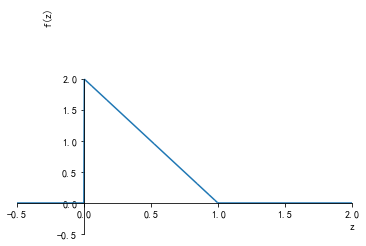

In [240]:
# 重写
fz_1 = Piecewise((1+z/x**2,(x>z)&(z>0)&(z<1)),(0,True))
fz_1
fz = Integral(fz_1,(x,z,1)).doit().subs(z,1+z2).subs(z2,z-1)# 最终结果
fz
fz.args[0]
# 重写
fz_2 = Piecewise((fz.args[0][0],(z>0)&(z<1)),(0,True)) # 最终结果
fz_2
# dir(fz)
plot(fz_2,xlim=(-0.5,2),ylim=(-0.5,3))

##### fz.args 重要属性
fz.args


#### 1999年数学四第11题
$设二维随机变量(X,Y)在矩形上服从均匀分布\\
G=\{(x,y)|0\le x\le 2,0\le y\le 1\}\\
试求边长为x和y的矩形面积S的概率密度f(s)$

In [243]:
# Z=XY
x,y,z = symbols('x y z')
z1 = symbols('z',positive=True)
z2 = symbols('z',negative=True)
fxy = Piecewise((1/2,(x>0)&(x<=2)&(y>=0)&(y<=1)),(0,True))
fxy

Piecewise((0.5, (y >= 0) & (x <= 2) & (y <= 1) & (x > 0)), (0, True))

Piecewise((0.5, (x <= 2) & (x > 0) & (x > z) & (z > 0) & (z < 2)), (0, True))

Piecewise((-0.5*log(z) + 0.5*log(2), (z > 0) & (z < 2)), (0, True))

1.00000000000000

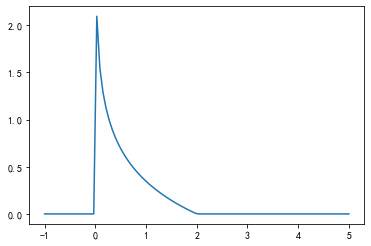

In [299]:
fxz = Piecewise((1/2,(x>0)&(x<=2)&(z>0)&(z<x)&(z<2)),(0,True))
fxz
fz1 = Integral(fxz/x,(x,z,2))
fz2 = fz1.doit().subs(z,z1).subs(z1,z2+2).subs(z2,z-2) 
# 重写
fz2 = Piecewise((fz2, (z>0)&(z<2)),(0,True)) # 最终结果
fz2
# plot(fz2) # log打印不出来
# 改用matplotlib打印
x_1 = np.linspace(-1,5,100)
z_1=[]
for x1 in x_1:
    z_1.append(fz2.subs(z,x1).evalf())
#     if isinstance(fz2.subs(z,x1).evalf(), Add):
#         z_1.append(0)
#     else:
#         z_1.append(fz2.subs(z,x1).evalf())
# z_1
plt.plot(x_1,z_1)
integrate(fz2,(z,0,oo)).evalf()

### Z=max{X,Y}与Z=min{X,Y}的分布  
$F_{max}(z)=P\{max\{X,Y\}\le z\}=P\{X\le z,Y\le z\}=P\{X\le z\}P\{Y\le z\}=F_X(z)F_Y(z)\\
F_{min}(z)=P\{min\{X,Y\}\le z\}=1-P\{min\{X,Y\}>z\}=1-P\{X>z,y>z\}=\ 1-P\{X>z\}P\{y>z\}=\ 1-[1-P\{X\le z\}][1-P\{Y\le z\}]=1-[1-F_X(z)][1-F_Y(z)]
$  
以上情况可以推广到n个相互独立的随机变量

#### 例11  
$设随机变量X,Y的概率密度为\\
f(x,y)=\begin{cases}{e\over e-1}e^{-(x+y)}&0<x<1,y>0\\0&其它\end{cases}\\
验证X与Y相互独立并求函数U=max\{X,Y\}的分布函数应该对应的概率密度$

In [302]:
x,y,z,u = symbols('x y z u')
# z1 = symbols('z',positive=True)
# z2 = symbols('z',negative=True)
fxy = Piecewise(((E/(E-1))*exp(-x-y),(x>0)&(x<1)&(y>0)),(0,True))
fxy
integrate(fxy,(x,-oo,oo),(y,-oo,oo))

Piecewise((E*exp(-x - y)/(-1 + E), (x > 0) & (y > 0) & (x < 1)), (0, True))

1

In [313]:
fx = Integral(fxy,(y,0,oo)).doit()
fy = Integral(fxy,(x,0,1)).doit()
fx
fy
simplify(fx)
simplify(fy)
# 说明独立性
simplify(fx*fy) # 说明相互独立


Piecewise((E*exp(-x)/(-1 + E), (x > 0) & (x < 1)), (0, True))

Piecewise((-E*exp(-y - 1)/(-1 + E) + E*exp(-y)/(-1 + E), (y > 0) & (y < oo)), (0, True))

Piecewise((-exp(1 - x)/(1 - E), (x > 0) & (x < 1)), (0, True))

Piecewise((exp(-y), (y > 0) & (y < oo)), (0, True))

Piecewise((-exp(-x - y + 1)/(1 - E), (x > 0) & (y > 0) & (x < 1) & (y < oo)), (0, True))

False

Piecewise((0, x < 0), ((exp(1 - x) - E)/(1 - E), True))

Piecewise((0, y < 0), (1 - exp(-y), True))

Piecewise((0, z < 0), (-(1 - exp(z))**2*exp(1 - 2*z)/(1 - E), True))

'***'

Piecewise(((exp(1 - z) - E)/(1 - E), (z > 0) & (z < 1)), (1, z >= 1), (0, z <= 0))

Piecewise((1 - exp(-z), z > 0), (0, True))

Piecewise((-(1 - exp(z))**2*exp(1 - 2*z)/(1 - E), (z > 0) & (z < 1)), (1 - exp(-z), z >= 1), (0, z <= 0))

Piecewise((2*(1 - exp(z))*exp(1 - 2*z)/(1 - E), (z > 0) & (z < 1)), (exp(-z), z >= 1), (0, z <= 0))

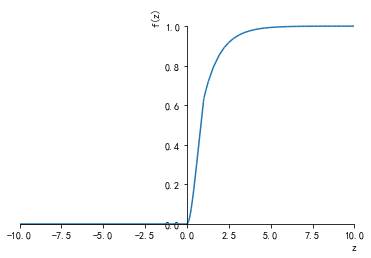

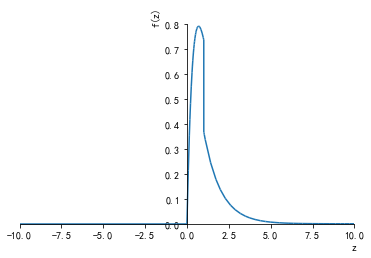

In [351]:
x1 = symbols('x', negative=True)
# Integral(fx, (x, 0, x)).doit()
Fx = Integral(fx, (x, 0, x)).doit().subs(x, 1 + x1).subs(x1, x - 1)  # x有范围,要处理
Fy = Integral(fy, (y, 0, y)).doit()
simplify(Fx)
Fy
Fu = simplify(Fx.subs(x, z) * Fy.subs(y, z))
Fu

"***"
# 在积分过后可能要做一下简单的重写处理
# 重写Fx,Fy
Fx_ = Piecewise((Fx.args[1][0], (x > 0) & (x < 1)), (1, x >= 1),
                (0, x <= 0)).subs(x, z)
Fy_ = Piecewise((Fy.args[1][0], (y > 0)), (0, y <= 0)).subs(y, z)
simplify(Fx_)
Fy_

Fu_ = simplify(Fx_ * Fy_)  # 最终结果
Fu_
fu_ = simplify(diff(Fu_, z))  # 最终结果
fu_
plot(Fu_)
plot(fu_)

#### 例12  
$设二维随机变量(X,Y)的分布率为 \\
\begin{array}{c|cccccc}
YX & 0 & 1 & 2 & 3 & 4 & 5\\
\hline
0 & 0.00 & 0.01 & 0.03 & 0.05 & 0.07 & 0.09 \\
1 & 0.01 & 0.02 & 0.04 & 0.05 & 0.06 & 0.08\\
2 & 0.01 & 0.03 & 0.05 & 0.05 & 0.05 & 0.06\\
3 & 0.01 & 0.02 & 0.04 & 0.06 & 0.06 & 0.05\\
\end{array}\\
求V=max\{X,Y\}和U=min\{X,Y\}的分布律$

In [397]:
np.set_printoptions(threshold=np.inf, precision=2, suppress=True)
arr1 = np.array([[0.00, 0.01, 0.03, 0.05, 0.07, 0.09],
                 [0.01, 0.02, 0.04, 0.05, 0.06, 0.08],
                 [0.01, 0.03, 0.05, 0.05, 0.05, 0.06],
                 [0.01, 0.02, 0.04, 0.06, 0.06, 0.05]])
V1={}
U1={}
# V1[0]=1
for i in range(4):
    for j in range(6):
        if max(i,j) in V1.keys():
            V1[max(i,j)]+=arr1[i,j]
        else:
            V1[max(i,j)]=arr1[i,j]
        if min(i,j) in U1.keys():
            U1[min(i,j)]+=arr1[i,j]
        else:
            U1[min(i,j)]=arr1[i,j]

df_v= pd.DataFrame(data=V1.values(),index=V1.keys(),columns=['p']).T
df_v

df_u= pd.DataFrame(data=U1.values(),index=U1.keys(),columns=['p']).T
df_u
df_v.iloc[0,:].sum()
df_u.iloc[0,:].sum()

,0,1,2,3,4,5
p,0.0,0.04,0.16,0.28,0.24,0.28


,0,1,2,3
p,0.28,0.3,0.25,0.17


1.0

1.0

#### 2012年数学三第23题    
$设随机变量X与Y相互独立，且都服从参数为1的指数分布，求V=min\{X,Y\}的概率密度$  

In [403]:
x,y,z,v = symbols('x y z v')
fx = Piecewise((exp(-x),x>0),(0,True))
fy = Piecewise((exp(-y),y>0),(0,True))
fx
fy
Fx = Integral(fx,(x,0,x)).doit()
Fy = Integral(fy,(y,0,y)).doit()
Fx
Fy

Piecewise((exp(-x), x > 0), (0, True))

Piecewise((exp(-y), y > 0), (0, True))

Piecewise((0, x < 0), (1 - exp(-x), True))

Piecewise((0, y < 0), (1 - exp(-y), True))

Piecewise((0, v < 0), (1 - exp(-2*v), True))

Piecewise((0, v < 0), (2*exp(-2*v), True))

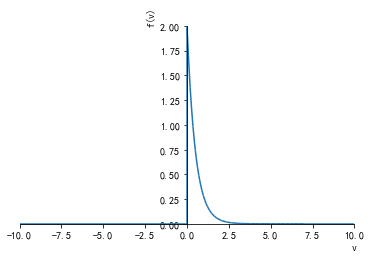

In [417]:
Fv = 1-(1-Fx.subs(x,v))*(1-Fy.subs(y,v))
Fv = simplify(Fv) # 最终结果
Fv
fv = diff(Fv,v)# 最终结果
fv
plot(fv)

# 随机变量的数字特征

## 数学期望

### 随机变量的数学期望

#### 0-1分布的数学期望

In [4]:
x, y, z = symbols('x y z')
p = symbols('p', positive=True)
n, k = symbols('n k', integer=True, positive=True)
# 0-1分布的数学期望
ex1 = 0*(1-p)+1*p
ex1 # 结果


#### 二项分布的数学期望  
$C_n^m={n\over m}C_{n-1}^{m-1}$

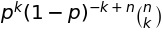

⎧                                          p       
⎪               n⋅p                 for ─────── ≤ 1
⎪                                       │p - 1│    
⎪                                                  
⎪           n                                      
⎪          ____                                    
⎪          ╲                                       
⎨           ╲      k        -k ⎛n⎞                 
⎪       n    ╲  k⋅p ⋅(1 - p)  ⋅⎜ ⎟                 
⎪(1 - p) ⋅   ╱                 ⎝k⎠     otherwise   
⎪           ╱                                      
⎪          ╱                                       
⎪          ‾‾‾‾                                    
⎪         False                                    
⎩                                                  

In [123]:
n, k = symbols('n k', integer=True, positive=True) # n设为正整数很重要
p = symbols('p', positive=True)

# 二项分布的概率
px = binomial(n, k) * p**(k) * (1 - p)**(n - k)
px
# 二项分布的全概率
summation(px, (k, 0, n)).simplify().args[0][0]
# 二项分布的数学期望
ex1 = summation(k*px, (k, 0, n)).simplify().args[0][0]
ex1 # 结果

#### 泊松分布的数学期望

In [221]:
lamda = symbols('lamda')
# 泊松分布的概率
px = exp(-lamda)*lamda**k/factorial(k)
px
# 泊松分布的全概率
summation(px, (k, 0, oo))
# 泊松分布的数学期望
ex1 = summation(k*px, (k, 0, oo))
ex1 # 结果


#### 几何分布的数学期望  


In [292]:
n, k = symbols('n k', integer=True, positive=True)
p = symbols('p', positive=True)
# 几何分布的概率
px = p * (1 - p)**(k-1)
# px = Piecewise((p * (1 - p)**(k-1), (p>0)&(p<1)),(0, True)) # 概率用分段函数表示
px
# 几何分布的全概率
summation(px, (k, 1, oo)).simplify().args[0][0]
# 几何分布的期望
ex1 = summation(k*px, (k, 1, oo)).simplify().args[0][0] 
ex1 # 结果

#### 超几何分布的数学期望   
$X\sim H(N,M,n)$   
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

In [91]:
n, k, N, M = symbols('n k N M', integer=True, positive=True)
p = symbols('p', positive=True)
# 超几何分布的概率
px = binomial(M, k) * binomial(N - M, n - k) / binomial(N, n)
px
# 超几何分布的全概率
summation(px, (k, 0, n)).simplify()
# 超几何分布的期望
ex1 = summation(k * px, (k, 0, n)).simplify()
ex1 # 结果

#### 均匀分布的数学期望

In [319]:
a, b = symbols('a b', real=True)
# a = symbols('a', real=True)
c = symbols('c', positive=True)
fx = Piecewise((1 / c, (x >= a) & (x <= a + c)), (0, True))
fx
# 均匀分布的全概率
p1 = Integral(fx, (x, a, a + c)).doit().simplify()
p1
# 均匀分布的数学期望
ex1 = Integral(x * fx, (x, a, a + c)).doit().simplify()
ex1
# 符号替换
# b = symbols('b', real=True) # b用符号替换回来
ex1.subs(c, (b - a)).simplify() # 结果

⎧1                       
⎪─  for a ≤ x ∧ x ≤ a + c
⎨c                       
⎪                        
⎩0        otherwise      

#### 指数分布的数学期望  
$f(x)=\lambda e^{-\lambda x}$

In [20]:
# 数学arg表示复数的辐角
x = symbols('x')
lamda = symbols('lamda', real=True)
fx = lamda * exp(-lamda * x)
fx_ = Piecewise((lamda * exp(-lamda * x),x>0),(0, True))
# 指数分布的概率密度
fx_
# 指数分布的全概率
Integral(fx, (x, 0, oo)).doit().args[0][0] # 如果按分段函数积不出来，所以只积0到正无穷
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, 0, oo)).doit().args[0][0]
ex1 # 结果

⎧   -λ⋅x           
⎪λ⋅ℯ      for x > 0
⎨                  
⎪   0     otherwise
⎩                  

#### 正态分布的数学期望

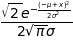

In [179]:
mu,sigma = symbols('mu sigma',real=True) # real设为True很重要
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
# 正态分布的全概率
Integral(fx, (x, -oo, oo)).doit().args[0][0] 
# 正态分布的数学期望
ex1 = Integral(x*fx, (x, -oo, oo)).doit().args[0][0]
ex1 # 结果

### 随机变量的函数的数学期望

In [25]:
x, y, z = symbols('x y z')
p, t  = symbols('p t', positive=True)
n, k = symbols('n k', integer=True, positive=True)
lamda = symbols('lamda')

#### 定理1  
$设X是离散型随机变量，其分布律为 \\ 
P(X=k)=p_k \ (k=1,2,...) \\ 
设Y是随机变量X的函数：Y=g(X)，\\
则E(Y)=E(g(x)) = \sum_{k=1}^{\infty}{g(x)p_k}，要求绝对收敛
$

##### 例12   
$设X\sim \pi(\lambda)，求E(1/(X+1))$

In [28]:
lamda = symbols('lamda')
px = exp(-lamda)*lamda**k/factorial(k)
# 𝐸(1/(𝑋+1))
ex1 = summation((1/(k+1))*px, (k, 0, oo)).simplify()
ex1 # 结果

#### 定理2  
$设X是连续型随机变量,其概率密度为f(x)，设Y是随机变量X的函数：Y=g(X)，其中g(x)是连续函数 \\ 
则E(Y)=E(g(x)) = \int_{-\infty}^{+\infty}g(x)f(x)dx，要求绝对收敛
$

##### 例14
$设随机变量X\sim E(1)，求Y=2X和Z=e^{-2X}的数学期望
$

In [24]:
fx = Piecewise((exp(-x), x>0),(0,True))
fx
Integral(x*fx,(x,0,oo)).doit()
# Y=2X
Integral(2*x*fx,(x,0,oo)).doit() # 2
Integral(exp(-2*x)*fx,(x,0,oo)).doit()

⎧ -x           
⎪ℯ    for x > 0
⎨              
⎪ 0   otherwise
⎩              

### 二维随机变量函数的数学期望

#### 命题1
$设二维离散型随机变量(X,Y)分布律为 \\ 
P(X=x_i,Y=y_j)=p_{ij} \ (i,j=1,2,...) \\ 
则函数Z=g(X,Y)的数学期望 \\
E(X)=E(g(X,Y)) = \sum_{j=1}^{\infty}\sum_{i=1}^{\infty}{g(x_i,y_j)p_{ij}}，要求绝对收敛
$

#### 命题2
$设二维连续型随机变量(X,Y)概率密度为地f(x,y) \\ 
则函数Z=g(X,Y)的数学期望 \\
E(X)=E(g(X,Y)) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}{g(x,y)f(x,y)dxdy}，要求绝对收敛
$

In [44]:
# x1 = symbols('x',positive=True)
fxy = Piecewise((3/(2*x**3*y**2),(x>1)&(y<x)&(y>(1/x))),(0,True))
fxy
print_latex(fxy)
# 整体不好求积分，分开求积分
Integral(fxy,(y,1/x,x)).doit()
i1 = Piecewise(((3/2)*(1/x**2-1/x**4),(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit()

⎧   3                             1
⎪───────  for x > 1 ∧ x > y ∧ y > ─
⎪   3  2                          x
⎨2⋅x ⋅y                            
⎪                                  
⎪   0             otherwise        
⎩                                  

\begin{cases} \frac{3}{2 x^{3} y^{2}} & \text{for}\: x > 1 \wedge x > y \wedge y > \frac{1}{x} \\0 & \text{otherwise} \end{cases}


⎧       3            3                     
⎪──────────────── - ────  for x > 1 ∧ x < ∞
⎪   3                  4                   
⎨2⋅x ⋅Min(1/x, x)   2⋅x                    
⎪                                          
⎪           0                 otherwise    
⎩                                          

⎧1.5   1.5           
⎪─── - ───  for x > 1
⎪  2     4           
⎨ x     x            
⎪                    
⎪    0      otherwise
⎩                    

##### 例15
$设随机变量(X,Y)的概率密度为\\
f(x,y)=\begin{cases} \frac{3}{2 x^{3} y^{2}} & \text{for}\: x > 1, \frac{1}{x}<y<x \\ 
0 & \text{otherwise} \end{cases}\\
求数学期望E(Y),E(1/XY)
$


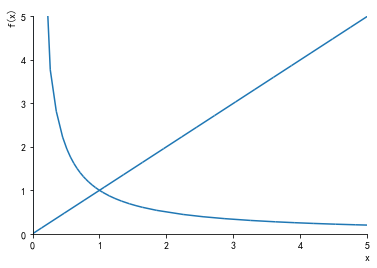

In [54]:
plot(1/x,x,xlim=(0,5),ylim=(0,5))

In [48]:
# E(Y)的数学期望
Integral(y*fxy,(y,1/x,x)).doit()
i1 = Piecewise((3*log(x)/x**3,(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit() # 结果3/4

⎧3⋅log(x)   3⋅log(Min(1/x, x))                   
⎪──────── - ──────────────────  for x > 1 ∧ x < ∞
⎪     3               3                          
⎨  2⋅x             2⋅x                           
⎪                                                
⎪              0                    otherwise    
⎩                                                

⎧3⋅log(x)           
⎪────────  for x > 1
⎪    3              
⎨   x               
⎪                   
⎪   0      otherwise
⎩                   

In [51]:
# E(1/XY)的数学期望  
Integral(fxy/(x*y),(y,1/x,x)).doit()
i1 = Piecewise(((3/4)*(1/x**2-1/x**6),(x>1)),(0, True))
i1
Integral(i1,(x,1,oo)).doit() # 结果0.6

⎧        3            3                     
⎪───────────────── - ────  for x > 1 ∧ x < ∞
⎪   4            2      6                   
⎨4⋅x ⋅Min(1/x, x)    4⋅x                    
⎪                                           
⎪           0                  otherwise    
⎩                                           

⎧0.75   0.75           
⎪──── - ────  for x > 1
⎪  2      6            
⎨ x      x             
⎪                      
⎪     0       otherwise
⎩                      

## 方差

### 随机变量的方差

#### 0-1分布的方差

In [3]:
x, y, z = symbols('x y z')
p = symbols('p', positive=True)
n, k = symbols('n k', integer=True, positive=True)

ex1 = 0 * (1 - p) + 1 * p
# 0-1分布的方差
# 定义法
dx1 = ((0 - ex1)**2 * (1 - p) + (1 - ex1)**2 * p).simplify()
dx1 
# 公式法
dx2 = (0**2 * (1 - p) + 1**2 * p - ex1**2).simplify()
dx2

#### 二项分布的方差
$C_n^m={n\over m}C_{n-1}^{m-1}$

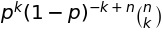

'***'

In [313]:
n, k = symbols('n k', integer=True, positive=True) # n设为正整数很重要
p,q= symbols('p q', positive=True)
# q = 1 - p
# 二项分布的概率
px = binomial(n, k) * p**(k) * (1 - p)**(n - k)
# px = binomial(n, k) * p**(k) * q**(n - k)
px
# 二项分布的全概率
summation(px, (k, 0, n)).simplify().args[0][0]
# 二项分布的数学期望
ex1 = summation(k*px, (k, 0, n)).simplify().args[0][0]
ex1
# 二项分布的方差
# 定义法: 太复杂，不好化简
# dx1 = summation((k-ex1)**2*px, (k, 0, n)).simplify()
# simplify(dacotx1) 
"***"
# 公式法
dx2 = summation(k**2*px, (k, 0, n)).args[0][0]-ex1**2
dx2 = simplify(dx2) 
dx2 # npq
simplify(dx2.replace((1-p1),q)) # 去掉负号


#### 泊松分布的方差

In [314]:
lamda = symbols('lamda')
# 泊松分布的概率
px = exp(-lamda)*lamda**k/factorial(k)
px
# 泊松分布的全概率
summation(px, (k, 0, oo))
# 泊松分布的数学期望
ex1 = summation(k*px, (k, 0, oo))
# 二项分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 0, oo)).simplify()
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 0, oo))-ex1**2).simplify()
dx2 

'***'

#### 几何分布的方差

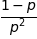

'***'

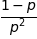

In [315]:
# 特别注意var和symbols的区别
n, k = symbols('n k', integer=True, positive=True)
p = symbols('p', positive=True)
# 几何分布的概率
px = p * (1 - p)**(k-1)
# px = Piecewise((p * (1 - p)**(k-1), (p>0)&(p<1)),(0, True)) # 概率用分段函数表示
px
# 几何分布的全概率
summation(px, (k, 1, oo)).simplify().args[0][0]
# 几何分布的期望
ex1 = summation(k*px, (k, 1, oo)).simplify().args[0][0] 
ex1
# 几何分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 1, oo)).simplify().simplify().args[0][0] # k要从1开始
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 1, oo))-ex1**2).simplify().args[0][0].simplify()
dx2 # 结果

#### 超几何分布的方差  
$X\sim H(N,M,n)$  
$p\{x=k\}=\frac{C_M^k C_{N-M}^{n-k}}{C_N^n}$

'*****'

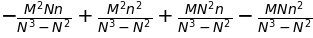

'***'

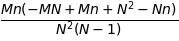

'*****'

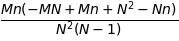

In [316]:
n, k, N, M = symbols('n k N M', integer=True, positive=True)
p = symbols('p', positive=True)
# 超几何分布的概率
px = binomial(M, k) * binomial(N-M, n-k)/binomial(N, n) 
px
# 超几何分布的全概率
summation(px, (k, 0, n)).simplify() 
# 超几何分布的期望
ex1 = summation(k*px, (k, 0, n)).simplify() 
"*****"
# 超何分布的方差
# 定义法: 
dx1 = summation((k-ex1)**2*px, (k, 0, oo)).simplify().args[0][0].expand()
dx1 
"***"
# 公式法
dx2 = (summation(k**2*px, (k, 0, oo))-ex1**2).simplify().args[0][0]
dx2 # 结果
"*****"
# 验证
dx_ = n*M/N - (n*M/N)**2 + n*(n-1)*M*(M-1)/(N*(N-1)) # 正确结果
# dx_
dx_.simplify()

#### 均匀分布的方差

In [317]:
a,b=symbols('a b',real=True)
# a = symbols('a', real=True)
c = symbols('c', positive=True)
# b = a + c
fx = Piecewise((1 / c, (x >= a) & (x <= a + c)), (0, True))
fx
# 均匀分布的全概率
p1 = Integral(fx, (x, a, a + c)).doit().simplify()
p1
# 均匀分布的数学期望
ex1 = Integral(x * fx, (x, a, a + c)).doit().simplify()
ex1
"*****"
# 均匀分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, a, a + c)).doit().simplify()
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, a, a + c)).doit()-ex1**2).simplify()
dx2
# 符号替换
# b = symbols('b', real=True) # b用符号替换回来
# ex1.subs(c,(b-a)).simplify()
dx1.subs(c,(b-a)).simplify() # 结果

⎧1                       
⎪─  for a ≤ x ∧ x ≤ a + c
⎨c                       
⎪                        
⎩0        otherwise      

'*****'

'***'

#### 指数分布的方差  
$f(x)=\lambda e^{-\lambda x}$

In [22]:
# 数学arg表示复数的辐角
x = symbols('x')
lamda = symbols('lamda', real=True)
fx = lamda * exp(-lamda * x)
fx_ = Piecewise((lamda * exp(-lamda * x),x>0),(0, True))
# 指数分布的概率密度
fx_
# 指数分布的全概率
Integral(fx, (x, 0, oo)).doit().args[0][0] # 如果按分段函数积不出来，所以只积0到正无穷
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, 0, oo)).doit().args[0][0]

# 指数分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, 0, oo)).doit().simplify().args[0][0]
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, 0, oo)).doit()-ex1**2).simplify().args[0][0]
dx2 # 结果

⎧   -λ⋅x           
⎪λ⋅ℯ      for x > 0
⎨                  
⎪   0     otherwise
⎩                  

'***'

#### 正态分布的方差

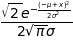

'*****'

'***'

In [318]:
mu,sigma = symbols('mu sigma',real=True) # real设为True很重要
fx = (1/(sigma*sqrt(2*pi)))*exp(-(x-mu)**2/(2*sigma**2))
fx
# 指数分布的全概率
Integral(fx, (x, -oo, oo)).doit().args[0][0] 
# 指数分布的数学期望
ex1 = Integral(x*fx, (x, -oo, oo)).doit().args[0][0]
"*****"
# 正态分布的方差
# 定义法: 
dx1 = Integral((x-ex1)**2 * fx, (x, -oo, oo)).doit().simplify().args[0][0]
dx1 
"***"
# 公式法
dx2 = (Integral(x**2 * fx, (x, -oo, oo)).doit()-ex1**2).simplify().args[0][0]
dx2 # 结果

## 协方差及相关系数


## 矩、协方差矩阵

In [99]:
Integral(sin(x)/x,(x,0,oo)).doit()